# Important python libraries

 - `numpy` (numerics) + `scipy` (scientific functions) 
 - `matplotlib` - plotting
 - `astropy` - convenient operations on data for Data Science  (`pandas` is another alternative) 
 - `scikit-learn` - machine learning
 
We'll meet them very soon during the ML session.

## Hello numpy!

`numpy` is the core of scientific python. It is the most convenient way to organize number-crunching in python.

In [1]:
import numpy

In [2]:
x = numpy.arange(10)
x
## What's the difference between a list in Python and a numpy.arange?

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
x.reshape(5,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [7]:
x.reshape(2, 5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [8]:
# slicing has the same logic for lists / strings / tuples / numpy, etc
x[:4]

array([0, 1, 2, 3])

In [9]:
print x[:3]
print x[3:7]
print x[7:]

[0 1 2]
[3 4 5 6]
[7 8 9]


### Vector operations

In [12]:
x = numpy.arange(10 ** 6)
# vector operations do similar task for each element. In this case each element is multiplied by 3 and 12 added.
print x
print 3 * x + 12.

[     0      1      2 ..., 999997 999998 999999]
[  1.20000000e+01   1.50000000e+01   1.80000000e+01 ...,   3.00000300e+06
   3.00000600e+06   3.00000900e+06]


In [14]:
# use timing magic to understand this is quite fast
%timeit 3 * x + 12.

100 loops, best of 3: 7.39 ms per loop


In [17]:
Z = numpy.arange(15).reshape(5, 3)
Z

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [18]:
numpy.log(numpy.exp(Z)) # type conversion happened

array([[  0.,   1.,   2.],
       [  3.,   4.,   5.],
       [  6.,   7.,   8.],
       [  9.,  10.,  11.],
       [ 12.,  13.,  14.]])

In [19]:
Z += 4

In [20]:
Z

array([[ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [32]:
print Z[::2,:]
print Z[::2] #gives same result, why is the ",:" needed for?
print Z[::2,1:2] #now I know lol xD

[[ 4  5  6]
 [10 11 12]
 [16 17 18]]
[[ 4  5  6]
 [10 11 12]
 [16 17 18]]
[[ 5]
 [11]
 [17]]


In [45]:
print Z[[0, 2, 4], :]
print Z
numpy.sum?

[[ 4  5  6]
 [10 11 12]
 [16 17 18]]
[[ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]
 [16 17 18]]


In [42]:
print Z.sum(axis=1)
print Z.sum(axis=0)

[15 24 33 42 51]
[50 55 60]


In [43]:
# axes are also zero-numerated
Z.sum(axis=0)

array([50, 55, 60])

In [46]:
Z.max(axis=1)

array([ 6,  9, 12, 15, 18])

In [47]:
Z2 = - Z
Z2 = numpy.sort(Z2, axis=1)
Z2

array([[ -6,  -5,  -4],
       [ -9,  -8,  -7],
       [-12, -11, -10],
       [-15, -14, -13],
       [-18, -17, -16]])

## Indexing with boolean array

In [96]:
x = numpy.arange(10)
x
print x

[0 1 2 3 4 5 6 7 8 9]


In [49]:
x > 3

array([False, False, False, False,  True,  True,  True,  True,  True,  True], dtype=bool)

In [50]:
x[x < 7.4]

array([0, 1, 2, 3, 4, 5, 6, 7])

## Copies

Many operations in numpy don't create copies, but operate with the same memory 

In [70]:
x = numpy.arange(10)
y = x[:5]
z = numpy.arange(-10,10)
print x, y
y[0] = 10
print x, y
print z

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4]
[10  1  2  3  4  5  6  7  8  9] [10  1  2  3  4]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


this happened because x and y point __to the same place in memory__

In [51]:
x = numpy.arange(10)
y = x[:5].copy()
print x, y
y[0] = 10
print x, y

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4]
[0 1 2 3 4 5 6 7 8 9] [10  1  2  3  4]


## Random numbers

module `numpy.random` helps with generating random numbers

In [24]:
# generating 10000 random numbers at once
numpy.random.normal(loc=2, scale=12, size=10000)

array([ 11.78220635,   8.93663103, -17.50627085, ...,  17.10257018,
         7.24243523,  -0.95099759])

## Sorting

In [52]:
x = numpy.random.random(size=1000)
x = numpy.sort(x)

In [53]:
print x[:10]
print x[-10:]

[ 0.00079363  0.00181992  0.00260246  0.00357025  0.00541872  0.00711193
  0.00889961  0.00930866  0.0096442   0.00987037]
[ 0.99223872  0.99225742  0.99244583  0.99324259  0.9961338   0.99636424
  0.99734876  0.99874227  0.9990551   0.9998984 ]


## Arg...

arg-functions allow writing non-trivial operations with a couple of lines

In [57]:
# random.random generates uniform in [0, 1]
random_numbers = numpy.random.random(size=1000)
indices = numpy.argsort(random_numbers)
#print indices
numpy.argsort?

In [28]:
numpy.alltrue(random_numbers[indices] == numpy.sort(random_numbers))

True

In [58]:
indices[:10]

array([132, 810, 251, 538, 490, 540,  95, 461, 681, 836])

In [59]:
random_numbers.min(), random_numbers.max()

(0.0009618470217825914, 0.99970844374712431)

In [60]:
random_numbers.argmax(), random_numbers[random_numbers.argmax()]

(296, 0.99970844374712431)

In [61]:
random_numbers.argmin(), random_numbers[random_numbers.argmin()]

(132, 0.0009618470217825914)

## Exercise

In [84]:
# 0. import numpy
import numpy as np

In [99]:
# 1. sample 1000 elements from normal distribution 
#numpy.random?
#numpy.random.randn?
myNormNumbers = np.random.randn(1000)
#print myNormNumbers
#want to plot these numbers to see the sampling of the distribution!!!

In [100]:
# 2. leave only positive numbers (from previous exercise)
myPositiveNormNumbers = (myNormNumbers[myNormNumbers>0]).copy()
isPositive = True
for number in myPositiveNormNumbers:
    if number <= 0:
        isPositive = False
        print "There is a non-positive number, ", number
if isPositive:
    print "All selected numbers are positive"
#print myPositiveNormNumbers

All selected numbers are positive


In [102]:
# 3. count number of left numbers, their minimum, maximum, mean and variance.
nPositive = len(myPositiveNormNumbers)
minPositive = myPositiveNormNumbers.min()
maxPositive = myPositiveNormNumbers.max()
meanPositive = myPositiveNormNumbers.mean()
varPositive = myPositiveNormNumbers.var()
print "Number of positive normal-distributed numbers: ", nPositive
print "Min: ", minPositive, "; Max: ", maxPositive
print "Mean: ", meanPositive, "; Variance: ", varPositive
n = len(myNormNumbers)
#print myNormNumbers
minN = myNormNumbers.min()
maxN= myNormNumbers.max()
meanN = myNormNumbers.mean()
varN = myNormNumbers.var()
print "**************************************************"
print "Number of normal-distributed numbers: ", n
print "Min: ", minN, "; Max: ", maxN
print "Mean: ", meanN, "; Variance: ", varN

Number of positive normal-distributed numbers:  526
Min:  0.00195332694281 ; Max:  2.79975954754
Mean:  0.779292730966 ; Variance:  0.365653651488
**************************************************
Number of normal-distributed numbers:  1000
Min:  -2.99061655615 ; Max:  2.79975954754
Mean:  0.0234852304749 ; Variance:  1.00570118967


## References:
* `numpy` documentation: https://docs.scipy.org/doc/numpy/reference/
    * almost any question about `numpy` is already answered on stackoverflow
* [From python to numpy: a beautiful book about numpy](https://github.com/rougier/from-python-to-numpy)
* Data manipulation with `numpy`: tips and tricks [part1](http://arogozhnikov.github.io/2015/09/29/NumpyTipsAndTricks1.html), [part2](http://arogozhnikov.github.io/2015/09/30/NumpyTipsAndTricks2.html)


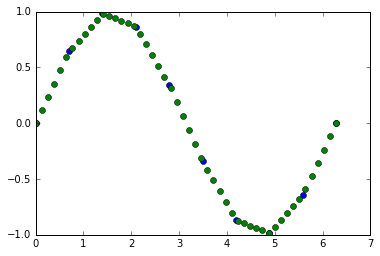

In [116]:
############ TEST AREA ##############

from __future__ import print_function # for python 2 & python 3 compatibility
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,10)
y = np.sin(x)
xvals = np.linspace(0,2*np.pi,50) #x values of linear interpolation
yinterp = np.interp(xvals,x,y)
#plotting
plt.plot(x,y,'o')
plt.plot(xvals,yinterp,'o')
plt.show()



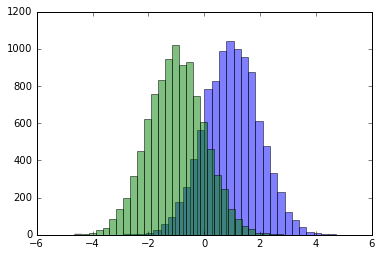

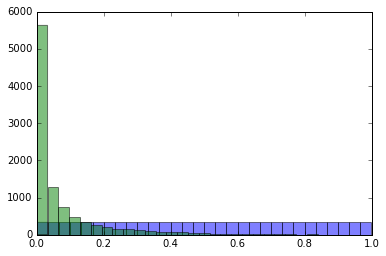

In [117]:
## Iron Transformation

class IronTransform:
    def fit(self, data, weights):
        weights = weights / weights.sum()
        sorter = np.argsort(data)
        self.x = data[sorter]
        self.y = np.cumsum(weights[sorter])
        return self
        
    def transform(self, data):
        return np.interp(data, self.x, self.y)
    
sig_pred = np.random.normal(size=10000) + 1
bck_pred = np.random.normal(size=10000) - 1

plt.figure()
plt.hist(sig_pred, bins=30, alpha=0.5)
plt.hist(bck_pred, bins=30, alpha=0.5)
plt.show()
iron = IronTransform().fit(sig_pred, weights=np.ones(len(sig_pred)))

plt.figure()
plt.hist(iron.transform(sig_pred), bins=30, alpha=0.5)
plt.hist(iron.transform(bck_pred), bins=30, alpha=0.5)
plt.show()